# Dataset
Age:Age of the patient (Numeric data type)
    
Sex:Gender of the patient (Nominal data type)
    
cp:Type of the chest pain experienced by the patient categorised       into 1 typical angina,2 atypical angina,3non-anginal     pain,4:asymptomatic trtbps : resting blood pressure (in mm Hg)(Nominal data type)

chol:Serum cholestoral in mg/dl (Numeric data type)

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) (Nominal data type)

rest_ecg : resting electrocardiographic results
Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria thalach : maximum heart rate achieved (Nominal data type) 
          
Target: 1= more chance of heart attack
        0= less chance of heart attack

In [67]:
#Importing required libraries

import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/aksha/Desktop/assignment/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.columns.values

array(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'], dtype=object)

Data cleaning and Preprocessing

In [6]:
data1=df.copy()

In [7]:
###To check the duplicates rows:

In [8]:
duplicate_rows=data1[data1.duplicated()]
print("Number of duplicate rows :",duplicate_rows.shape)

Number of duplicate rows : (1, 14)


In [9]:
## we have to remove that duplicate rows:

In [10]:
data1=data1.drop_duplicates()

In [11]:
#validating whether the duplicated rows are dropped
duplicate_rows=data1[data1.duplicated()]
print("Number of duplicate rows :",duplicate_rows.shape)

Number of duplicate rows : (0, 14)


In [12]:
###checking for Null values in the Dataset

In [13]:
data1.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [14]:
###check for outlier in the dataset

In [15]:
import seaborn as sns

In [16]:
data1.columns.values

array(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'], dtype=object)

<AxesSubplot:xlabel='age'>

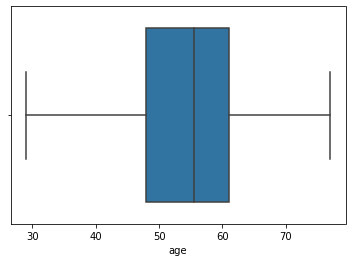

In [17]:
sns.boxplot(x=data1['age'])
##No outlier in Age

<AxesSubplot:xlabel='sex'>

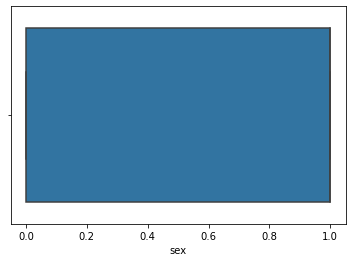

In [18]:
sns.boxplot(x=data1['sex'])
##No outlier in Sex

<AxesSubplot:xlabel='cp'>

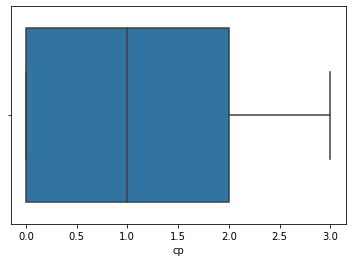

In [19]:
sns.boxplot(x=data1['cp'])
##No outlier in cp

<AxesSubplot:xlabel='trtbps'>

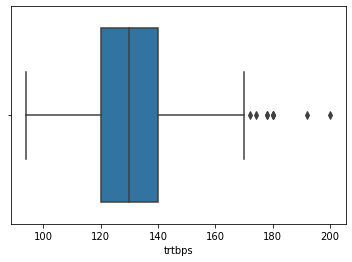

In [20]:
sns.boxplot(x=data1['trtbps'])
##Outlier are observed on the Upper Threshold

<AxesSubplot:xlabel='chol'>

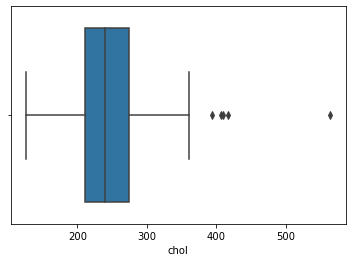

In [21]:
sns.boxplot(x=data1['chol'])
## Outlier are observed on the Upper Threshold

<AxesSubplot:xlabel='fbs'>

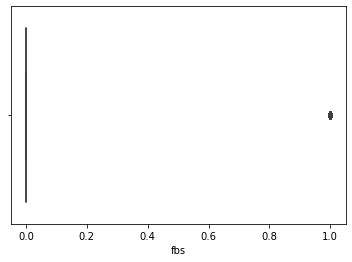

In [22]:
sns.boxplot(x=data1['fbs'])
##Outlier as its categerical

<AxesSubplot:xlabel='restecg'>

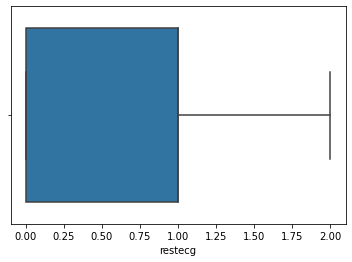

In [23]:
sns.boxplot(x=data1['restecg'])
## NO outlier 

<AxesSubplot:xlabel='thalachh'>

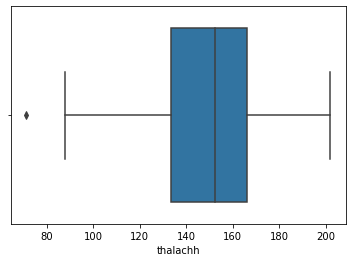

In [24]:
sns.boxplot(x=data1['thalachh'])
## Outlier are observed in Lower Threshold

<AxesSubplot:xlabel='exng'>

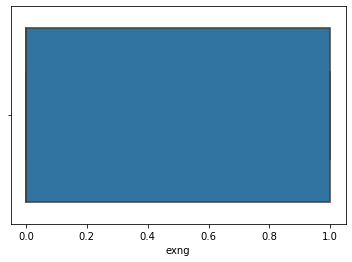

In [25]:
sns.boxplot(x=data1['exng'])
## NO outlier 

<AxesSubplot:xlabel='oldpeak'>

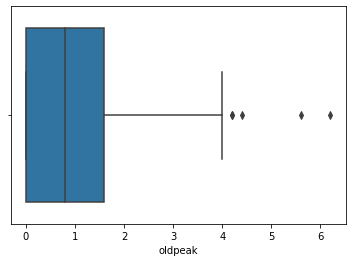

In [26]:
sns.boxplot(x=data1['oldpeak'])
## Outlier are observed in Upper Threshold

<AxesSubplot:xlabel='slp'>

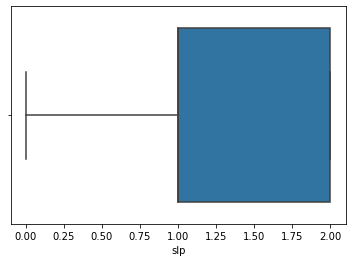

In [27]:
sns.boxplot(x=data1['slp'])
## NO Outlier 

<AxesSubplot:xlabel='caa'>

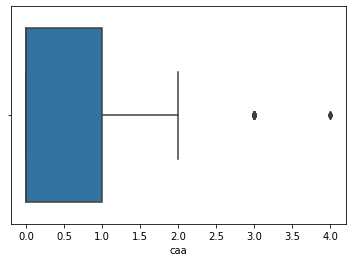

In [28]:
sns.boxplot(x=data1['caa'])
## Outlier are observed in Upper Threshold

<AxesSubplot:xlabel='thall'>

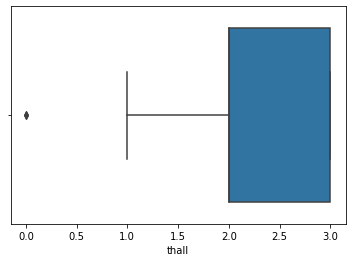

In [29]:
sns.boxplot(x=data1['thall'])
##Outlier are observed in Lower Threshold

In [30]:
Q1=data1.quantile(0.25)
Q3=data1.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64


In [31]:
##Removing outlier using IQR

In [32]:
data2=data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)] 

In [33]:
data2.shape

(228, 14)

<AxesSubplot:xlabel='chol'>

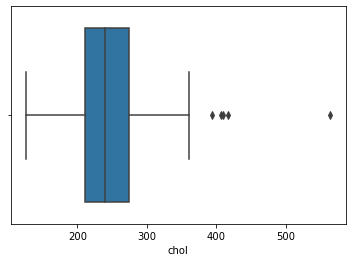

In [34]:
sns.boxplot(x=data1['chol'])

Z-Score

In [35]:
import numpy as np

In [36]:
from scipy import stats

In [37]:
z=np.abs(stats.zscore(data1))

In [38]:
print(z)

[[0.94979429 0.68265615 1.97647049 ... 0.71491124 2.1479552  0.91731315]
 [1.92854796 0.68265615 1.005911   ... 0.71491124 0.51399432 0.91731315]
 [1.48572607 1.46486632 0.0353515  ... 0.71491124 0.51399432 0.91731315]
 ...
 [1.50332164 0.68265615 0.93520799 ... 1.27497996 1.11996657 1.09014026]
 [0.28556146 0.68265615 0.93520799 ... 0.28003436 1.11996657 1.09014026]
 [0.28556146 1.46486632 0.0353515  ... 0.28003436 0.51399432 1.09014026]]


In [39]:
##if the z score is grater than 3,it states that the data 
##points are differ from the other data points and hence it is teated as outlier

In [40]:
data3=data1[(z<3).all(axis=1)]      ##outlier imputing standard deviation

In [41]:
data3.shape

(287, 14)

In [42]:
data3     ##As the z-score is having more rows ,we will move forword with this method

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


CORRELATION

In [43]:
corr=data3.corr()

<AxesSubplot:>

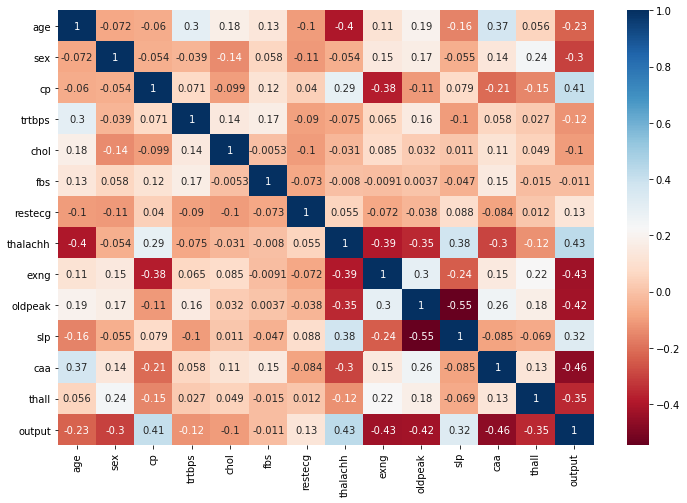

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='RdBu')

In [45]:
corr=data3.corr()['output']

In [46]:
### Highly important features
corr[np.abs(corr)>0.4] 

cp          0.408570
thalachh    0.431519
exng       -0.429082
oldpeak    -0.424443
caa        -0.463258
output      1.000000
Name: output, dtype: float64

In [47]:
##if the varience is less than 1 or 1 then those features will not able to make any impact on the models
data3.var()

age           82.684925
sex            0.214688
cp             1.076143
trtbps       288.723179
chol        2108.712410
fbs            0.122877
restecg        0.277747
thalachh     508.528228
exng           0.221023
oldpeak        1.167878
slp            0.368826
caa            0.855023
thall          0.341878
output         0.248313
dtype: float64

In [48]:
### model buliding and Planing
#domain-Doing this anlysis for medical

In [49]:
X=data3[['age','sex','cp','restecg','thalachh','exng','oldpeak','slp','caa','thall']]

In [50]:
X

,age,sex,cp,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,0,150,0,2.3,0,0,1
1,37,1,2,1,187,0,3.5,0,0,2
2,41,0,1,0,172,0,1.4,2,0,2
3,56,1,1,1,178,0,0.8,2,0,2
4,57,0,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,1,123,1,0.2,1,0,3
299,45,1,3,1,132,0,1.2,1,0,3
300,68,1,0,1,141,0,3.4,1,2,3
301,57,1,0,1,115,1,1.2,1,1,3


In [51]:
y=data3['output']

In [52]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 287, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
def scaled_data(dataset):
    from sklearn.preprocessing import StandardScaler
    dataset_scaled=StandardScaler().fit_transform(dataset)
    return dataset_scaled

In [57]:
Log=LogisticRegression()
Ds_tree=DecisionTreeClassifier(criterion='entropy')
Knn=KNeighborsClassifier(n_neighbors=5)
Rnd=RandomForestClassifier(criterion='entropy')

In [58]:
mod_train=Log.fit(X_train,y_train)
mod_train1=Ds_tree.fit(X_train,y_train)
mod_train2=Knn.fit(X_train,y_train)
mod_train3=Rnd.fit(X_train,y_train)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
mod_pred=mod_train.predict(X_test)
mod_pred1=mod_train1.predict(X_test)
mod_pred2=mod_train2.predict(X_test)
mod_pred3=mod_train3.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
print('The accuracy score for Logistic Regression:',round(accuracy_score(mod_pred,y_test),2)*100,'%')
print('The accuracy score for Decision Tree classifier:',round(accuracy_score(mod_pred1,y_test),2)*100,'%')
print('The accuracy score for KNeighborsClassifier:',round(accuracy_score(mod_pred2,y_test),2)*100,'%')
print('The accuracy score for RandomForestClassifier:',round(accuracy_score(mod_pred3,y_test),2)*100,'%')

The accuracy score for Logistic Regression: 79.0 %
The accuracy score for Decision Tree classifier: 76.0 %
The accuracy score for KNeighborsClassifier: 62.0 %
The accuracy score for RandomForestClassifier: 79.0 %


In [62]:
data5 = pd.DataFrame({'Actual Output': y_test,'Logistic Regression Prediction': mod_pred,'Descion Tree':mod_pred1,'KNN': mod_pred2,'Random Forest':mod_pred3})

d = {0:'less chance of heart attack - 0',1:'More chance of heart attack - 1'}

data5['Actual Output'] = data5['Actual Output'].map(d)

In [66]:
data5

,Actual Output,Logistic Regression Prediction,Descion Tree,KNN,Random Forest
294,less chance of heart attack - 0,0,1,0,1
112,More chance of heart attack - 1,1,0,0,1
301,less chance of heart attack - 0,0,0,0,0
68,More chance of heart attack - 1,1,1,1,1
101,More chance of heart attack - 1,0,0,0,0
...,...,...,...,...,...
142,More chance of heart attack - 1,1,1,1,1
106,More chance of heart attack - 1,1,0,0,0
157,More chance of heart attack - 1,1,1,1,1
252,less chance of heart attack - 0,0,0,0,0


In [63]:
Knn=KNeighborsClassifier(n_neighbors=5)
mod_train2=Knn.fit(X_train,y_train)
mod_pred2=mod_train2.predict(X_test)
print('The accuracy score for KNeighborsClassifier:',round(accuracy_score(mod_pred2,y_test),2)*100,'%')

The accuracy score for KNeighborsClassifier: 62.0 %


In [64]:
##Finding the  k value

Text(0.5, 1.0, 'k values vs Error rate')

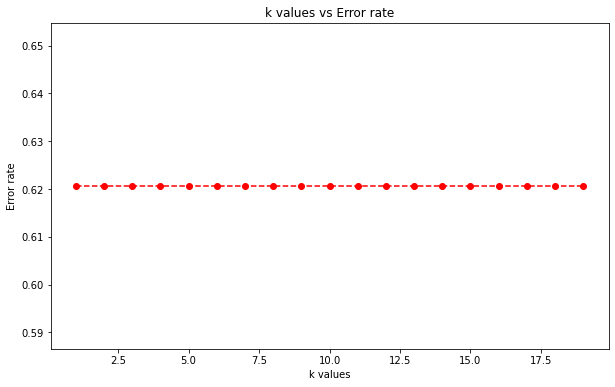

In [65]:
error_rate=[]
for i in range(1,20):
    Knn=KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train,y_train)
    error_rate.append(np.mean(y_test !=Knn.predict(scaled_data(X_test))))
 
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,'r--',marker='o')
plt.xlabel('k values')
plt.ylabel('Error rate')
plt.title('k values vs Error rate')